In [63]:
# Завдання 1
import pandas as pd
import numpy as np

pd.set_option('future.no_silent_downcasting', True)

data = pd.read_excel('En_In.xls', skipfooter=0)
data = data.iloc[17:244]
data = data.iloc[:, 2:]

data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

data.replace("...", np.nan, inplace=True)
data


,Country,Energy Supply,Energy Supply per Capita,% Renewable
17,Afghanistan,321,10,78.66928
18,Albania,102,35,100
19,Algeria,1959,51,0.55101
20,American Samoa,NaN,NaN,0.641026
21,Andorra,9,121,88.69565
...,...,...,...,...
239,Viet Nam,2554,28,45.32152
240,Wallis and Futuna Islands,0,26,0
241,Yemen,344,13,0
242,Zambia,400,26,99.71467


In [37]:
# Завдання 2
data['Energy Supply'] *= 1e6

data


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28.0,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
224,Yemen,3.440000e+08,13.0,0.000000
225,Zambia,4.000000e+08,26.0,99.714670


In [40]:
# Завдання 3
data['Country'] = data['Country'].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
})
data

# Розкоментувати для перевірки чи змінились назви
# countries_to_check = [
#     "South Korea", "United States", "United Kingdom", "Hong Kong"
# ]


# data[data['Country'].isin(countries_to_check)]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28.0,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
224,Yemen,3.440000e+08,13.0,0.000000
225,Zambia,4.000000e+08,26.0,99.714670


In [42]:
# Завдання 4
# Для перевірки розкоментувати
# data['Original Country'] = data['Country']

data['Country'] = data['Country'].str.replace(r"\(.*\)|\d+", "", regex=True).str.strip()

# Для перевірки розкоментувати (виведуться ті назви, що були змінені)
# changed_countries = data[data['Original Country'] != data['Country']]
# changed_countries[['Original Country', 'Country']]



In [44]:
# Завдання 5
gdp_data = pd.read_csv("gpd.csv", skiprows=4)

gdp_data = gdp_data[['Country Name','Country Code','Indicator Name', 'Indicator Code', '2006', '2007', '2008', '2009', '2010', 
                     '2011', '2012', '2013', '2014', '2015']]
gdp_data.columns = ['Country','Country Code','Indicator Name', 'Indicator Code', '2006', '2007', '2008', '2009', '2010', '2011', 
                    '2012', '2013', '2014', '2015']

gdp_data['Country'] = gdp_data['Country'].replace({
    "Iran, Islamic Rep.": "Iran",
    "Korea, Rep.": "South Korea",
    "Hong Kong SAR, China": "Hong Kong"
})
gdp_data.head(1)


,Country,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [45]:
# Завдання 6
scimago_data = pd.read_excel("scimagojr.xlsx")
scimago_data


,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


In [46]:
# Завдання 7
merged_data = pd.merge(scimago_data, data, how='inner', on='Country')
merged_data = pd.merge(merged_data, gdp_data, how='inner', on='Country')
merged_data = merged_data[merged_data['Rank'] <= 15]
merged_data.set_index('Country', inplace=True)
merged_data = merged_data[['Rank', 'Documents', 'Citable documents', 'Citations', 
                           'Self-citations', 'Citations per document', 'H index', 
                           'Energy Supply', 'Energy Supply per Capita', '% Renewable',
                           '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
                           '2013', '2014', '2015']]
merged_data.head(3)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12


In [47]:
# Завдання 8
def average_gdp(data):
    return data[['2006', '2007', '2008', '2009', '2010', 
                 '2011', '2012', '2013', '2014', '2015']].mean(axis=1).sort_values(ascending=False)

average_gdp(merged_data)


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [49]:
# Завдання 9
def gdp_change(data):
    avg_gdp = average_gdp(data)
    fifth_country = avg_gdp.index[4]
    gdp_diff = float(data.loc[fifth_country, '2015'] - data.loc[fifth_country, '2006'])
    return fifth_country, gdp_diff

gdp_change(merged_data)


('France', 153345695364.24023)

In [50]:
# Завдання 10
def max_renewable(data):
    max_country = data['% Renewable'].idxmax()
    percent = float(data.loc[max_country, '% Renewable'])
    return max_country, percent


max_renewable(merged_data)


('Brazil', 69.64803)

In [52]:
# Завдання 11
merged_data['Population Estimate'] = merged_data['Energy Supply'] / merged_data['Energy Supply per Capita']
population_sorted = merged_data['Population Estimate'].sort_values(ascending=False)
sixth_pop_country = population_sorted.index[5]
sixth_pop_value = float(population_sorted.iloc[5])
sixth_pop_result = (sixth_pop_country, sixth_pop_value)

display(sixth_pop_result)


('Japan', 127409395.97315437)

In [53]:
# Завдання 12
merged_data['Citable docs per Capita'] = merged_data['Citable documents'] / merged_data['Population Estimate']
correlation_value = merged_data['Citable docs per Capita'].corr(merged_data['Energy Supply per Capita'])
correlation_value = float(correlation_value)

display(correlation_value)



0.7940010435442946

In [54]:
# Завдання 13
def task_thirteen(data):
    median_renewable = data['% Renewable'].median()

    data['High Renewable'] = (data['% Renewable'] >= median_renewable).astype(int)
    
    result = data.sort_values(by='Rank')['High Renewable']
    return result

task_thirteen(merged_data)


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: High Renewable, dtype: int64

In [55]:
# Завдання 14
ContinentDict = {
    'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia', 
    'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 
    'Canada': 'North America', 'Germany': 'Europe', 'India': 'Asia', 
    'France': 'Europe', 'South Korea': 'Asia', 'Italy': 'Europe', 
    'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia', 
    'Brazil': 'South America'
}

merged_data['Continent'] = merged_data.index.map(ContinentDict)
continent_data = merged_data.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
continent_data


,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


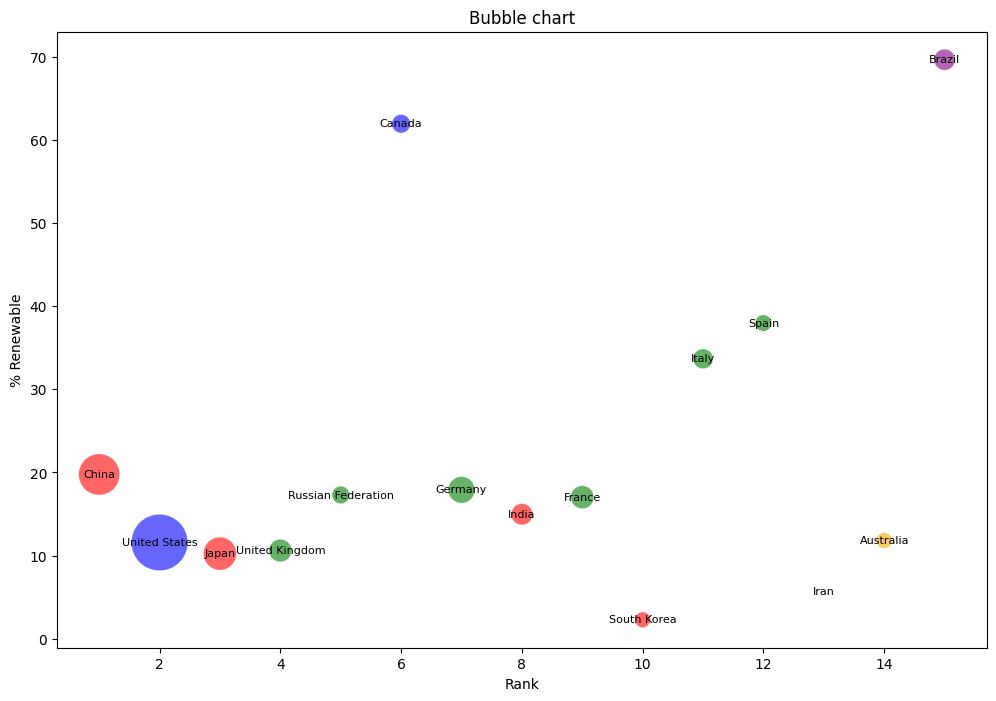

In [60]:
# Завдання 15
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
colors = {'Asia': 'red', 'Europe': 'green', 'North America': 'blue', 'South America': 'purple', 'Australia': 'orange'}
merged_data['GDP 2015'] = merged_data['2015']
merged_data['Color'] = merged_data['Continent'].map(colors)

if 'Country' not in merged_data.columns:
    merged_data = merged_data.reset_index()

plt.scatter(merged_data['Rank'], merged_data['% Renewable'], 
            s=merged_data['GDP 2015'] / 1e10, 
            c=merged_data['Color'], alpha=0.6, edgecolors="w", linewidth=0.5)

for i, row in merged_data.iterrows():
    plt.text(row['Rank'], row['% Renewable'], row['Country'], 
             ha='center', va='center', fontsize=8, color='black')

plt.xlabel('Rank')
plt.ylabel('% Renewable')
plt.title('Bubble chart')
plt.show()
